In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv("/content/sales_data_sample.csv", encoding='latin-1')
print("Shape of data: ",df.shape)
print(df.head())

Shape of data:  (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small
1        10121               34  ...              Paul     Small
2        10134               41  ...            Daniel    Medium
3        10145               45  ...             Julie    Medium
4        10159               49  ...             Julie    Medium

[5 rows x 25 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df = df.dropna()

In [8]:
df.shape

(147, 25)

In [9]:
#selecting columns numercal columns for clustering
data = df[['QUANTITYORDERED','PRICEEACH','SALES']]

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
#Find optomal K using elbow method
wcss = []
K = range(2,11)
for k in K:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

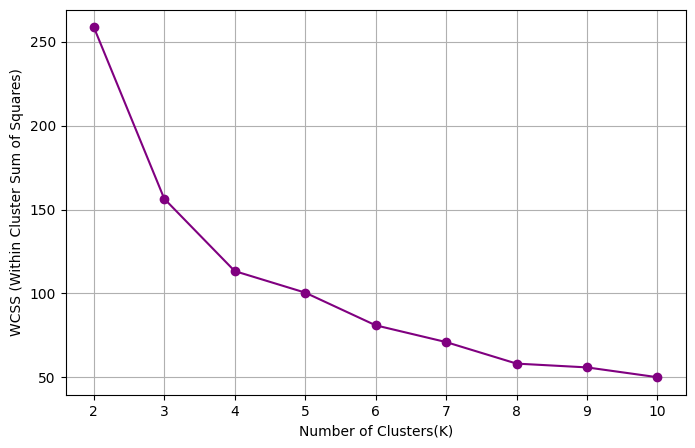

In [14]:
plt.figure(figsize = (8,5))
plt.plot(K,wcss,marker="o", color = 'purple')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

In [16]:
score = silhouette_score(data_scaled,df['Cluster'])
print(f"Silhouette Score : {score:.3f}")

Silhouette Score : 0.431


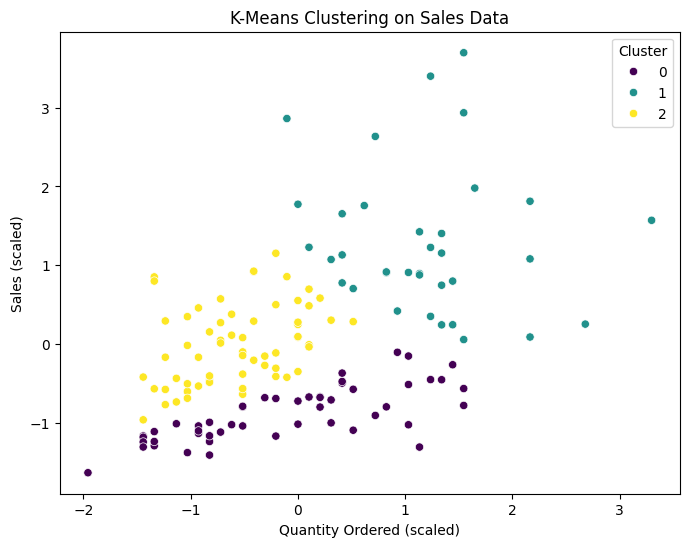

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x = data_scaled[:,0],
    y = data_scaled[:,2],
    hue = df['Cluster'],
    palette = 'viridis'
)

plt.title("K-Means Clustering on Sales Data")
plt.xlabel("Quantity Ordered (scaled)")
plt.ylabel("Sales (scaled)")
plt.legend(title='Cluster')
plt.show()

In [20]:
print("\n Cluster Summary (mean values):")
print(df.groupby('Cluster')[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].mean())


 Cluster Summary (mean values):
         QUANTITYORDERED  PRICEEACH        SALES
Cluster                                         
0                   32.8  59.395600  1922.667000
1                   45.4  95.408571  5646.476286
2                   28.5  97.730645  3432.298387
